In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
merged_df = pd.read_csv("new_data/merged_data.csv")
per_million_df = pd.read_csv("new_data/merged_per_million.csv")


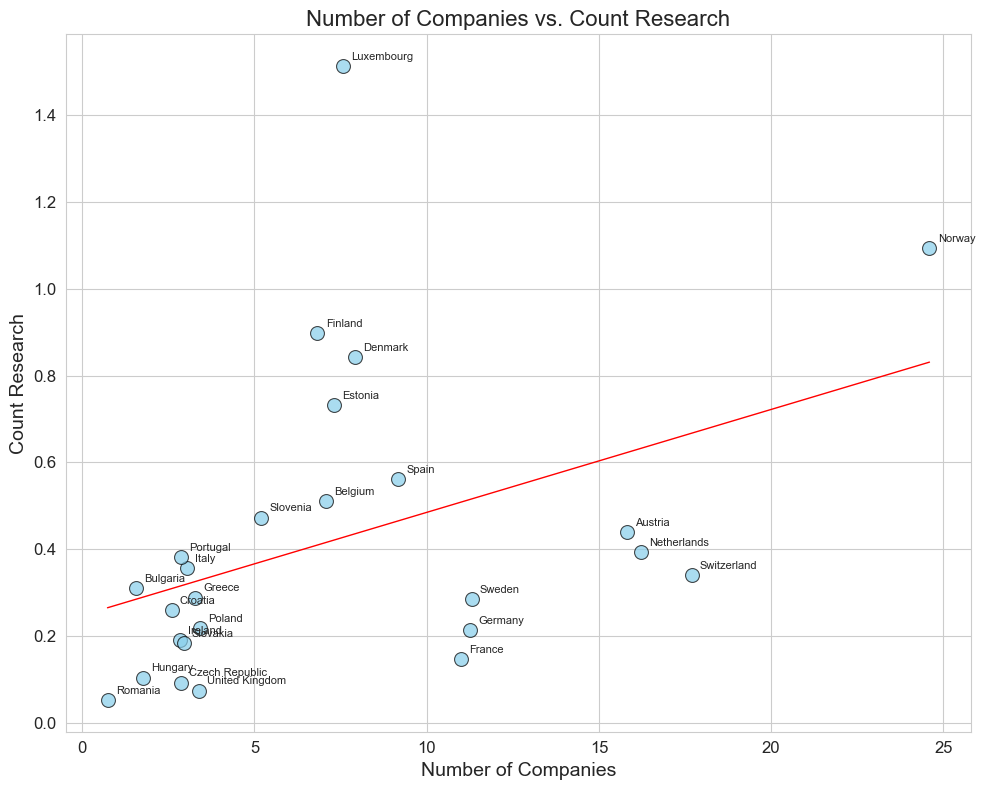

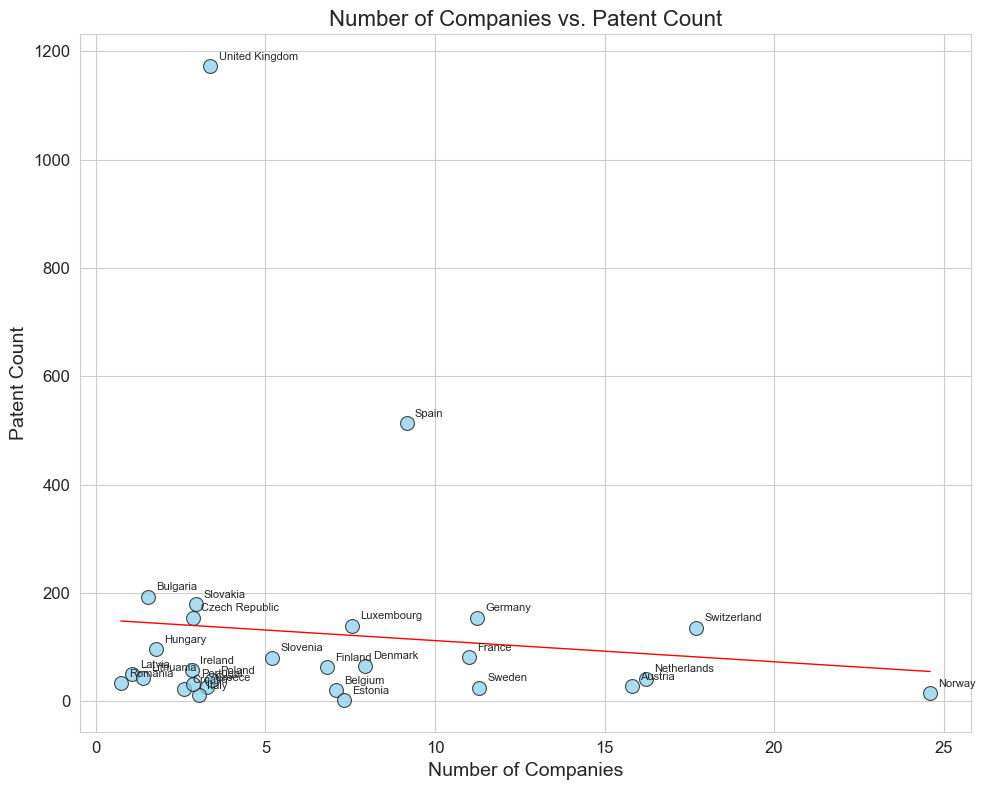

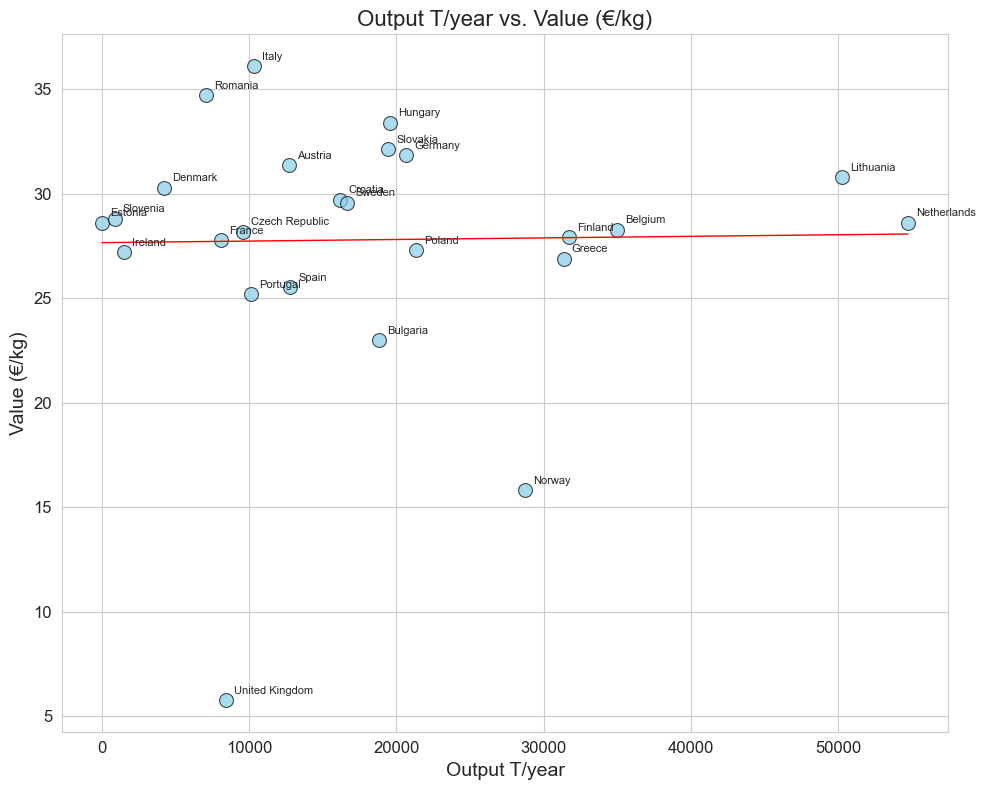

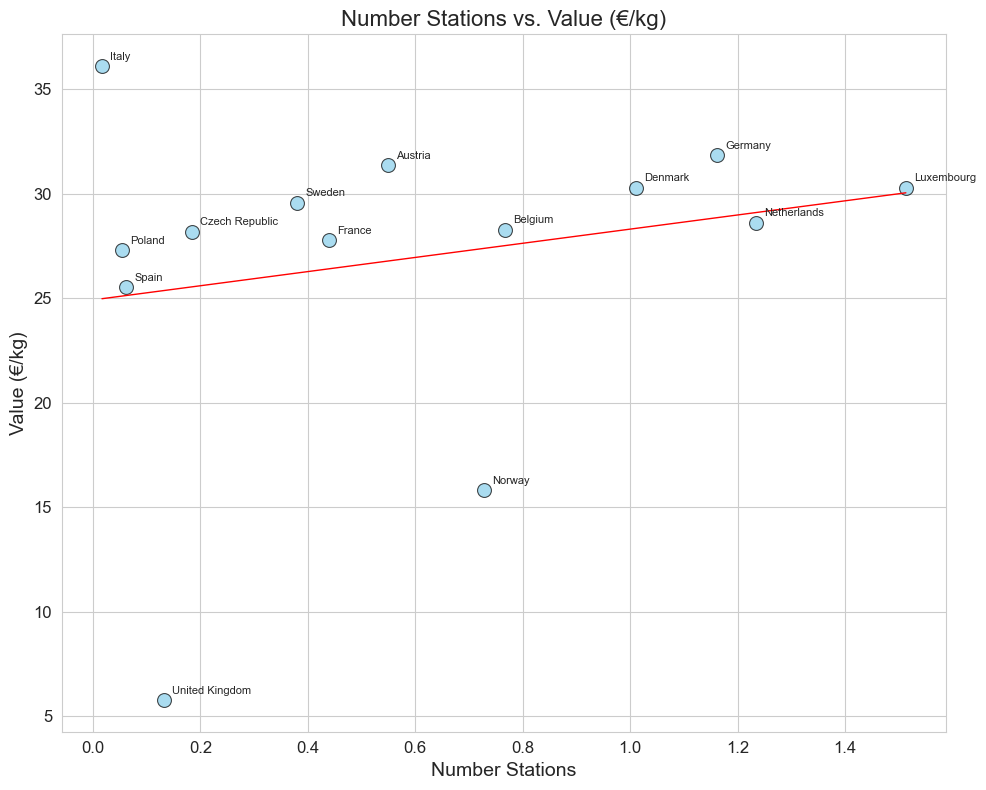

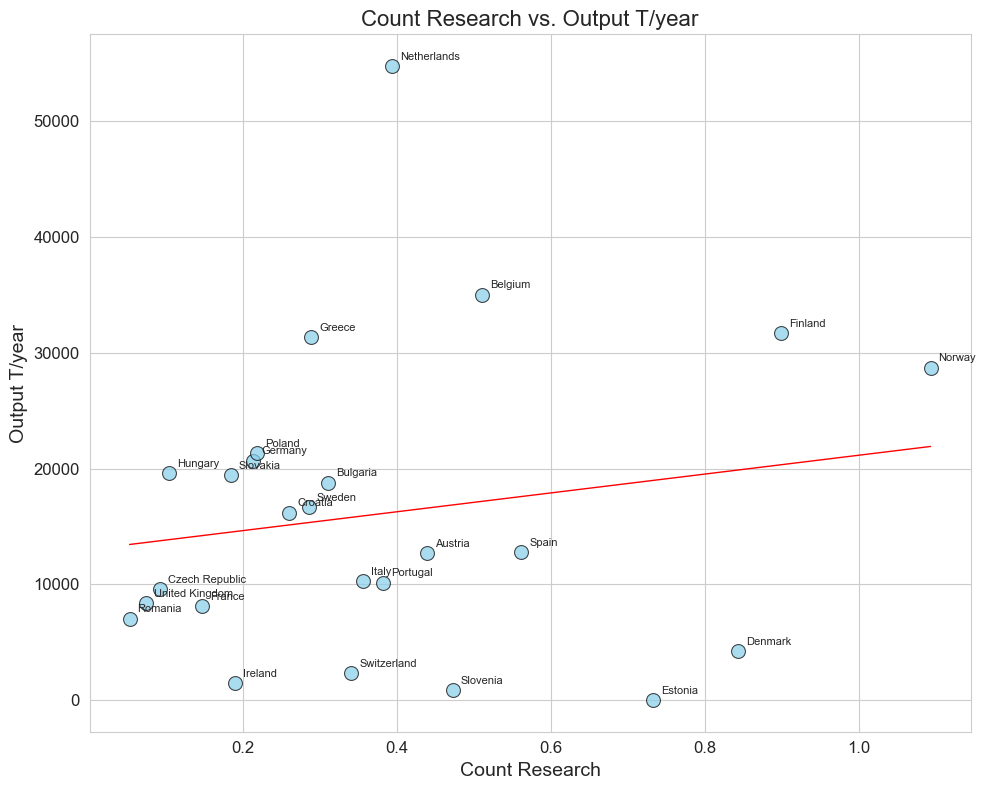

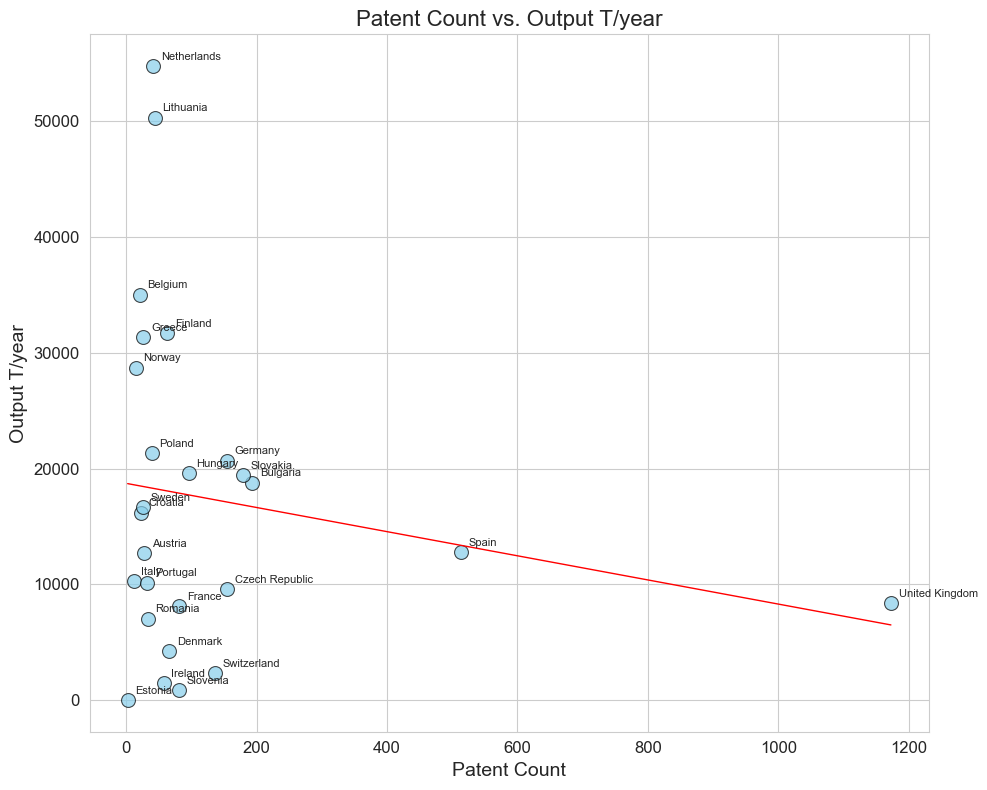

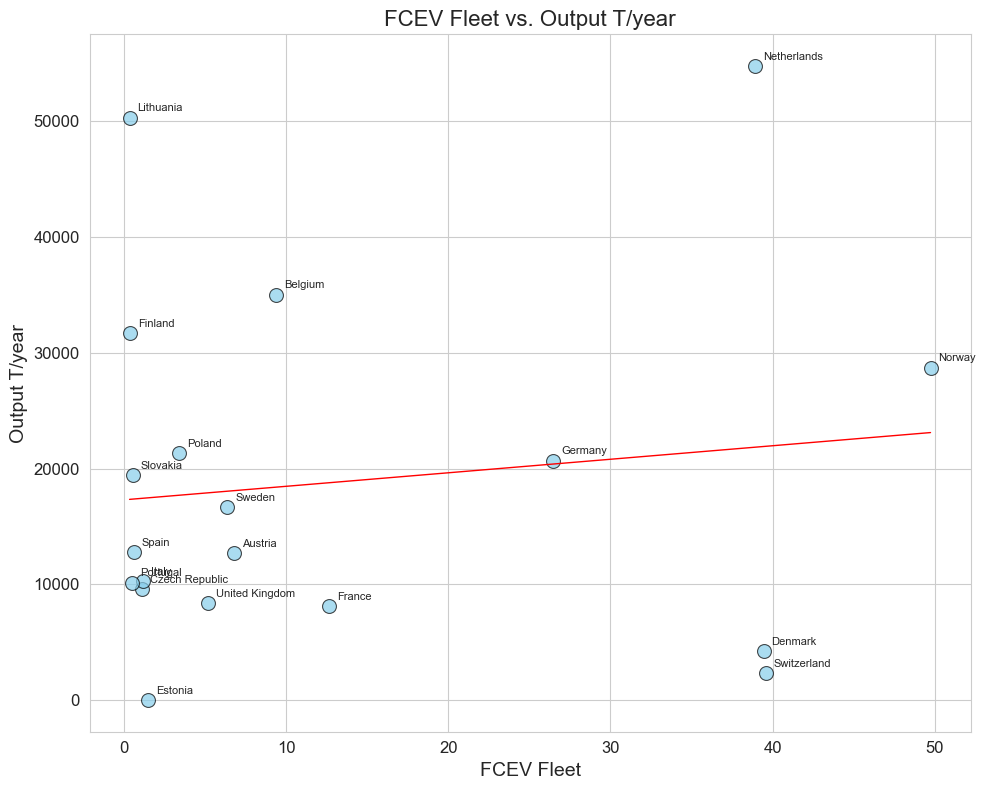

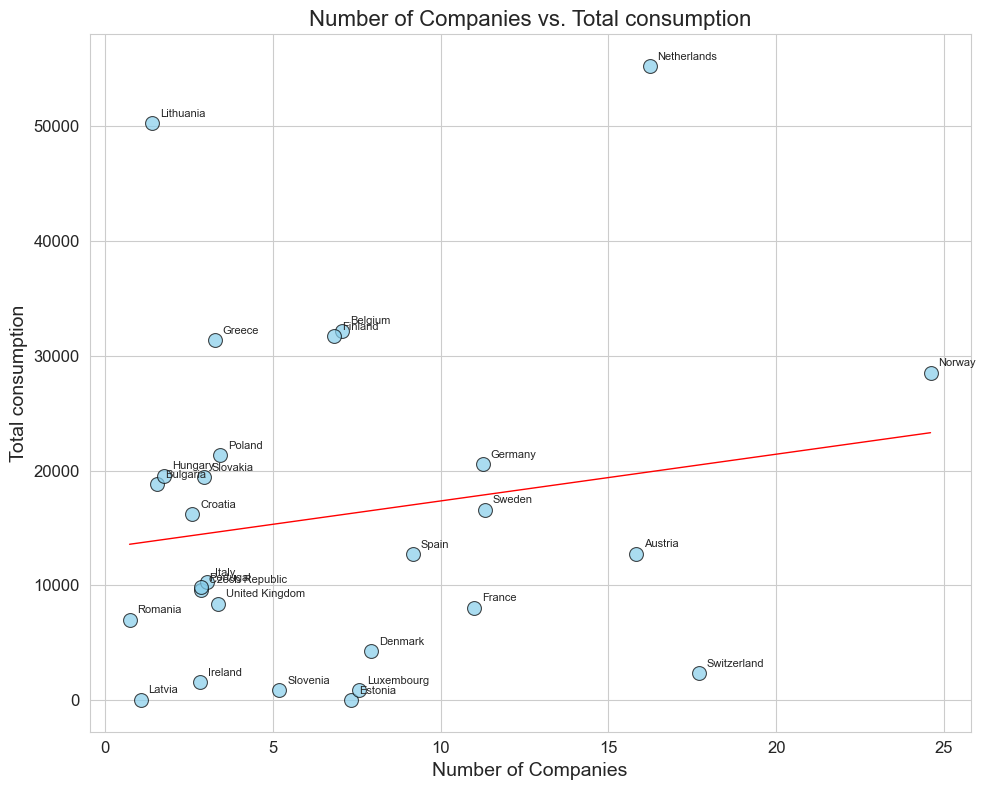

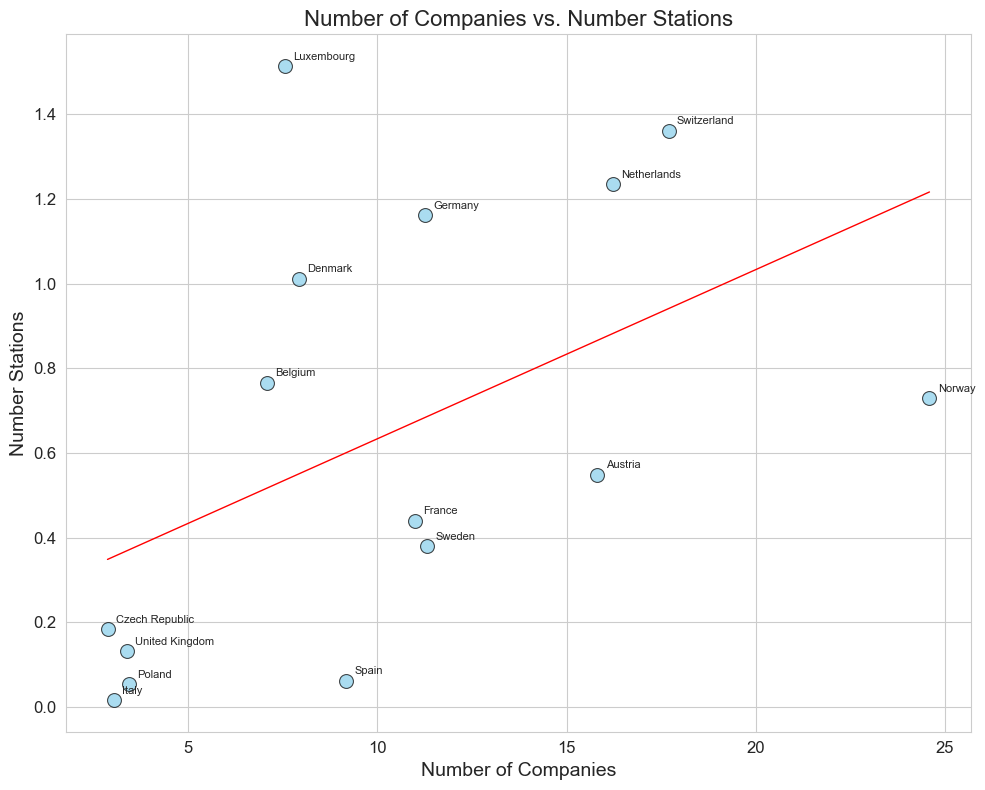

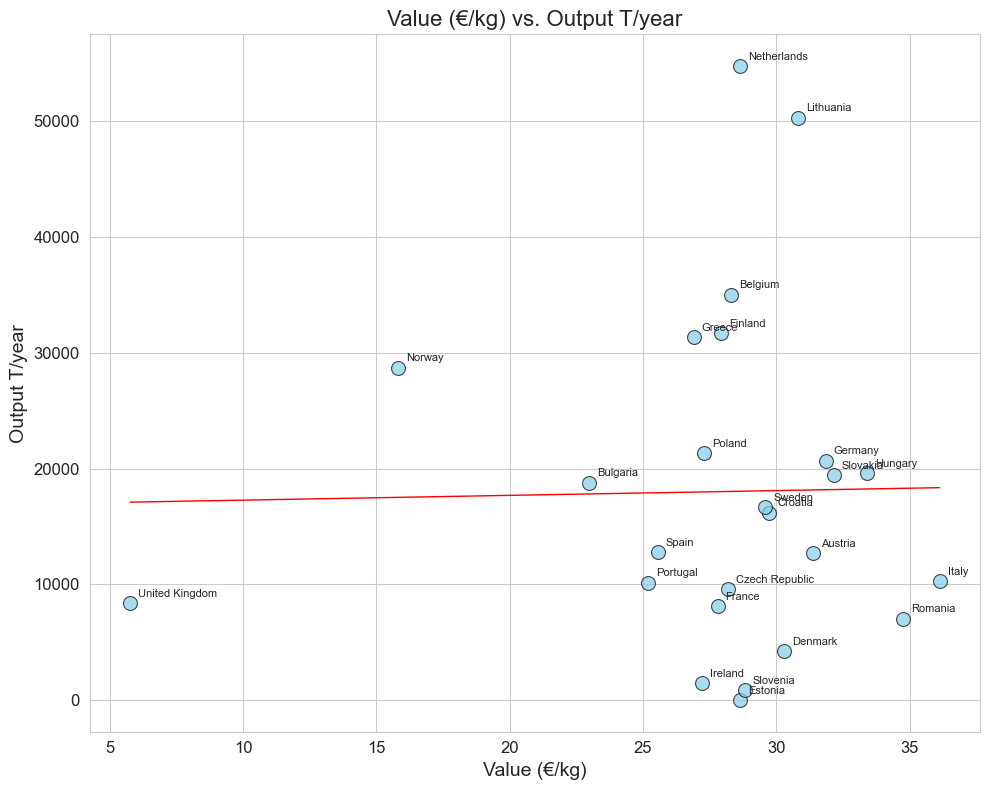

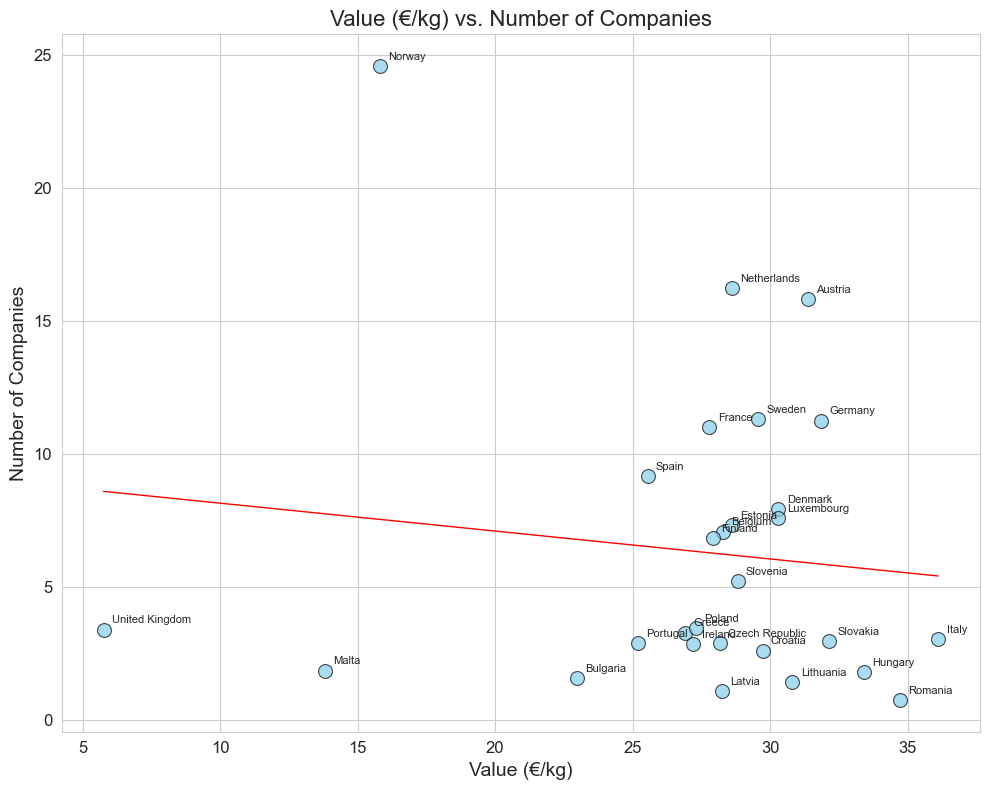

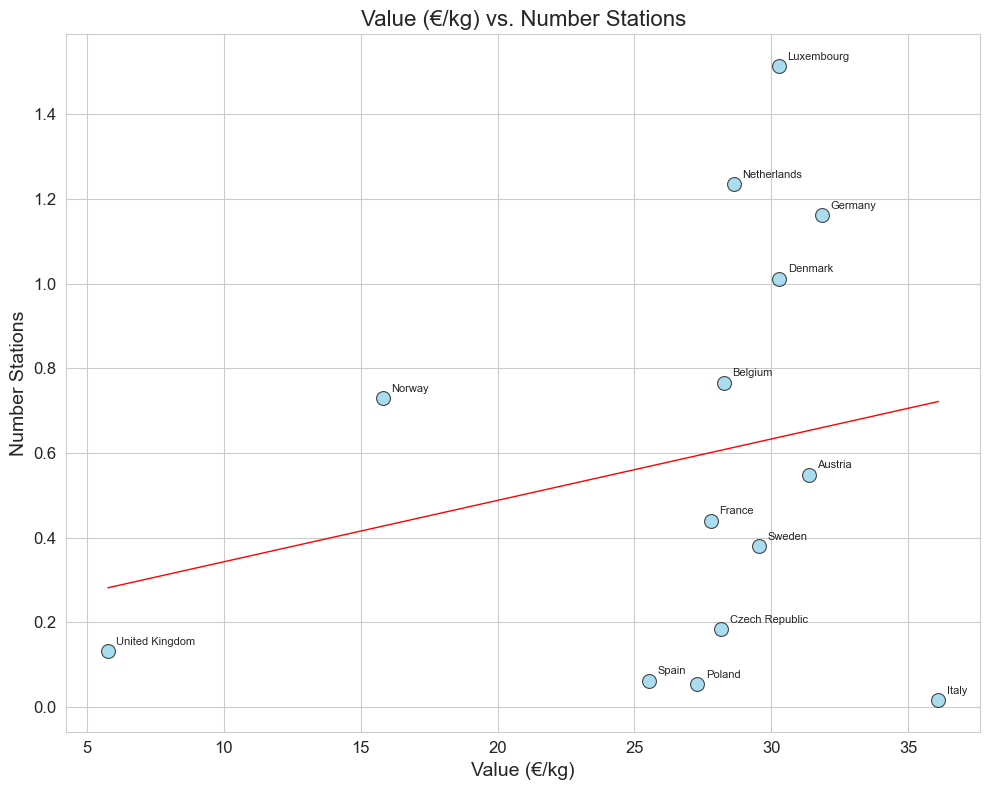

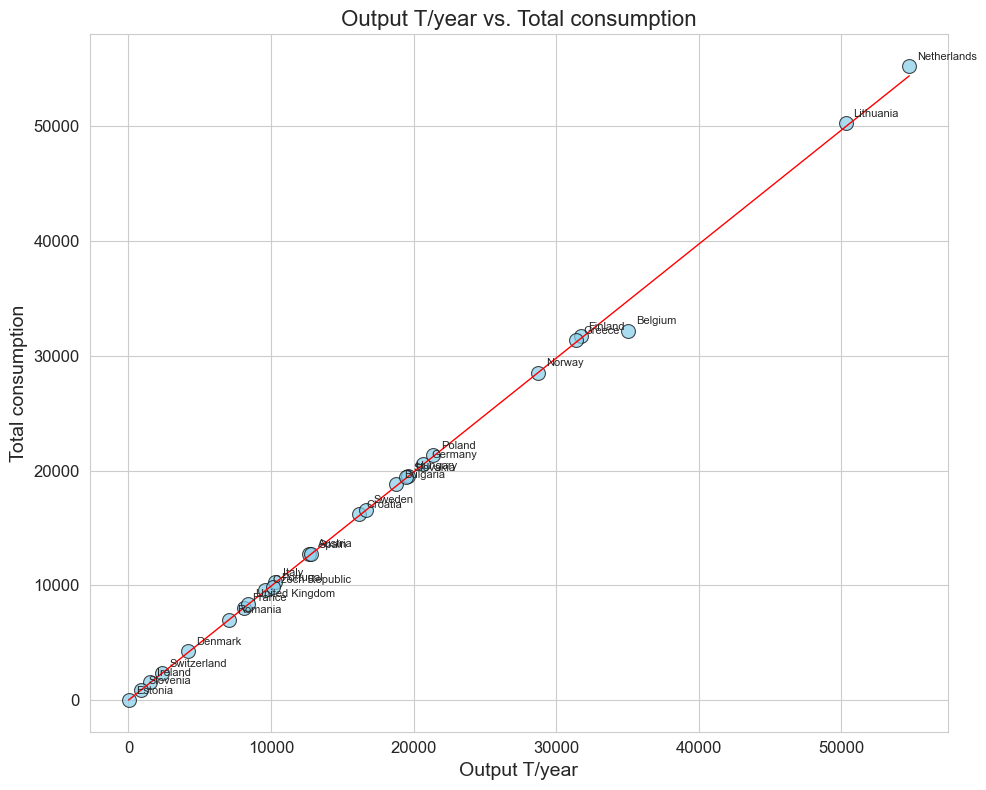

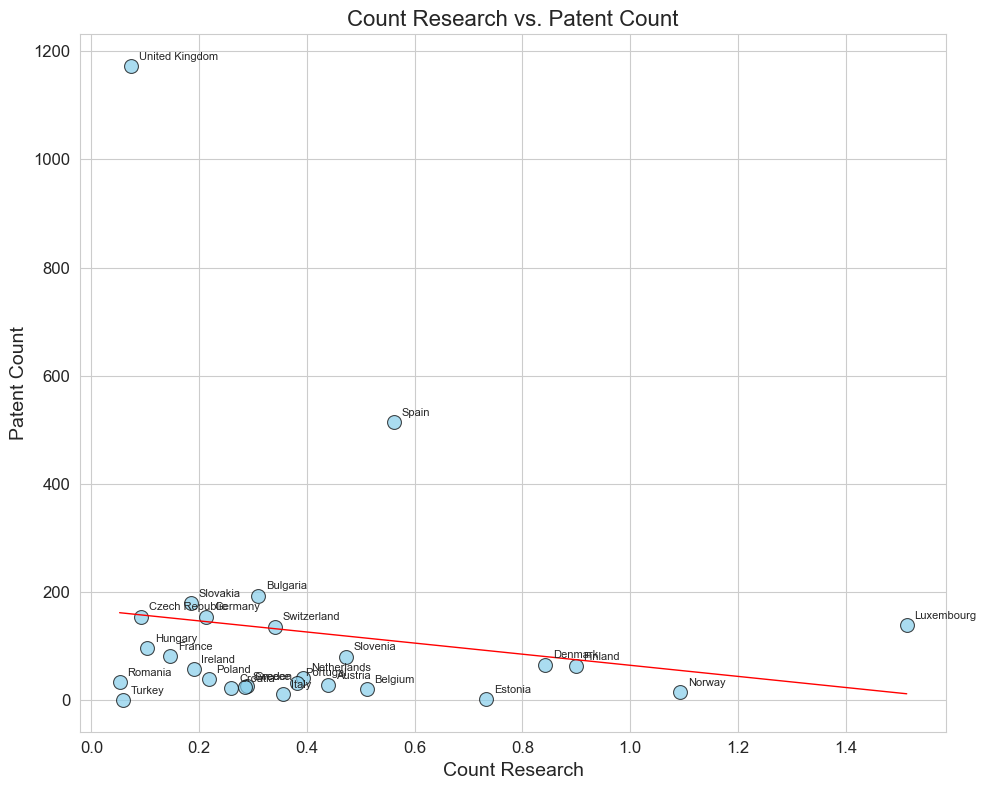

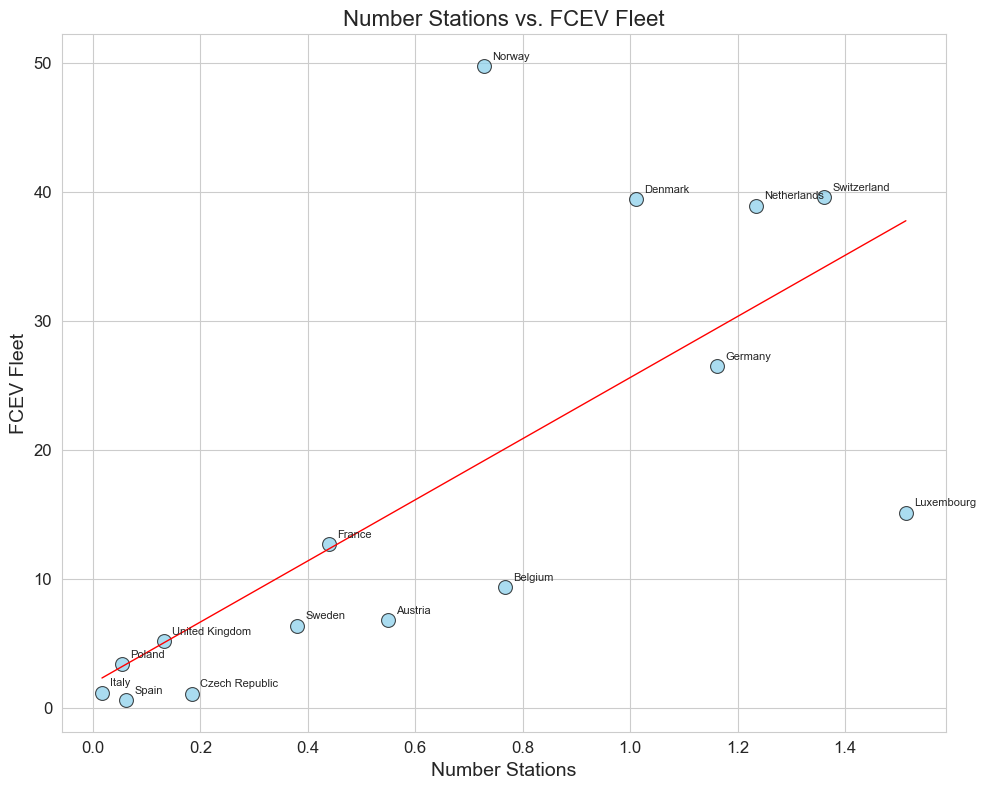

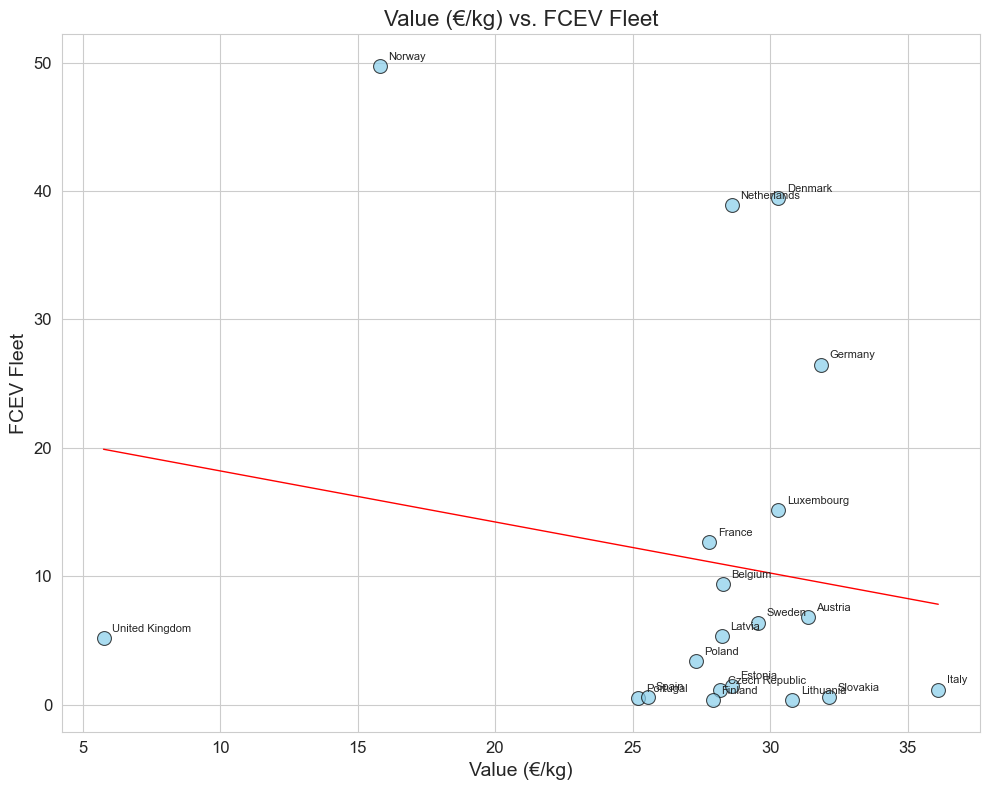

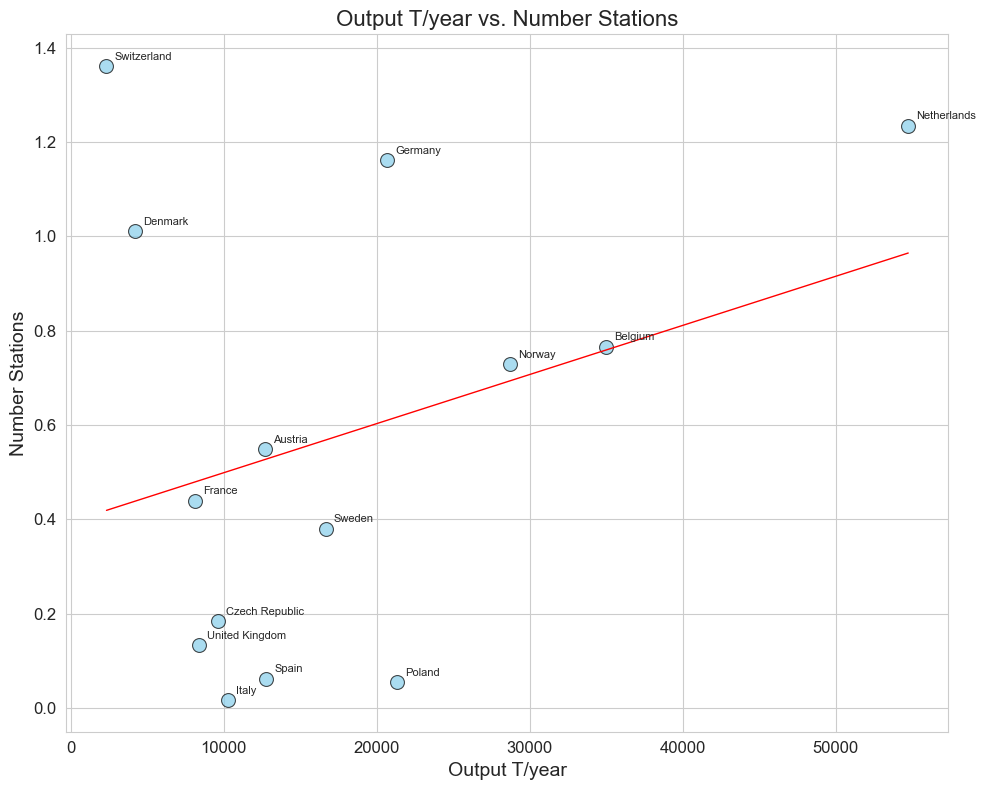

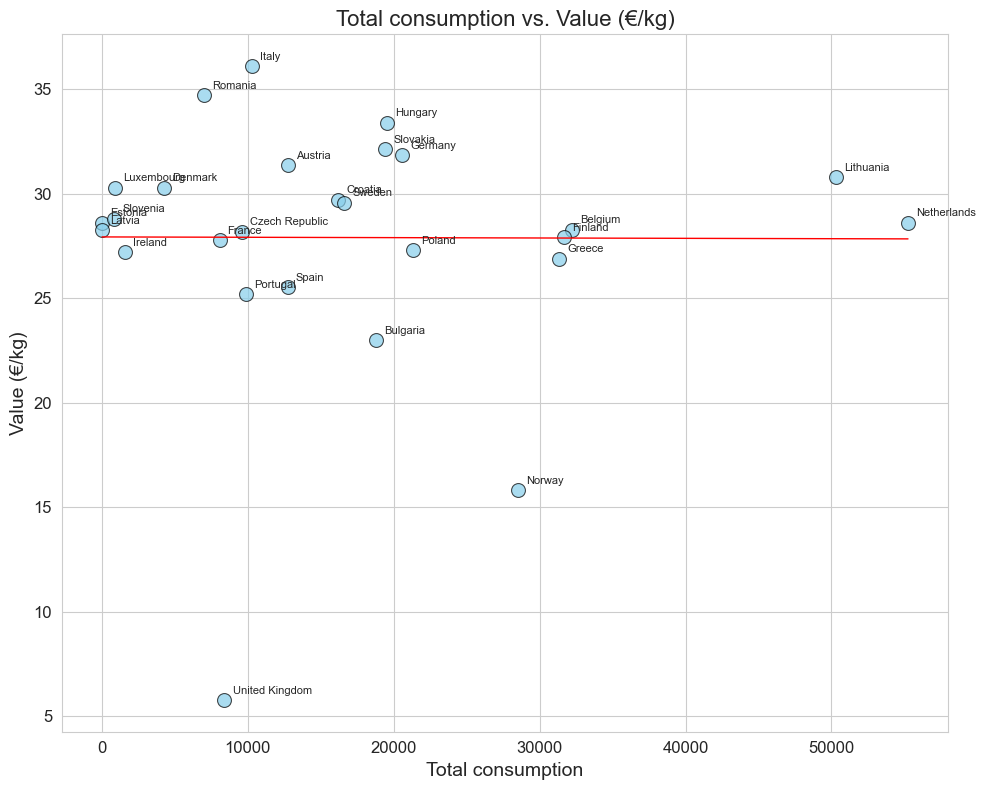

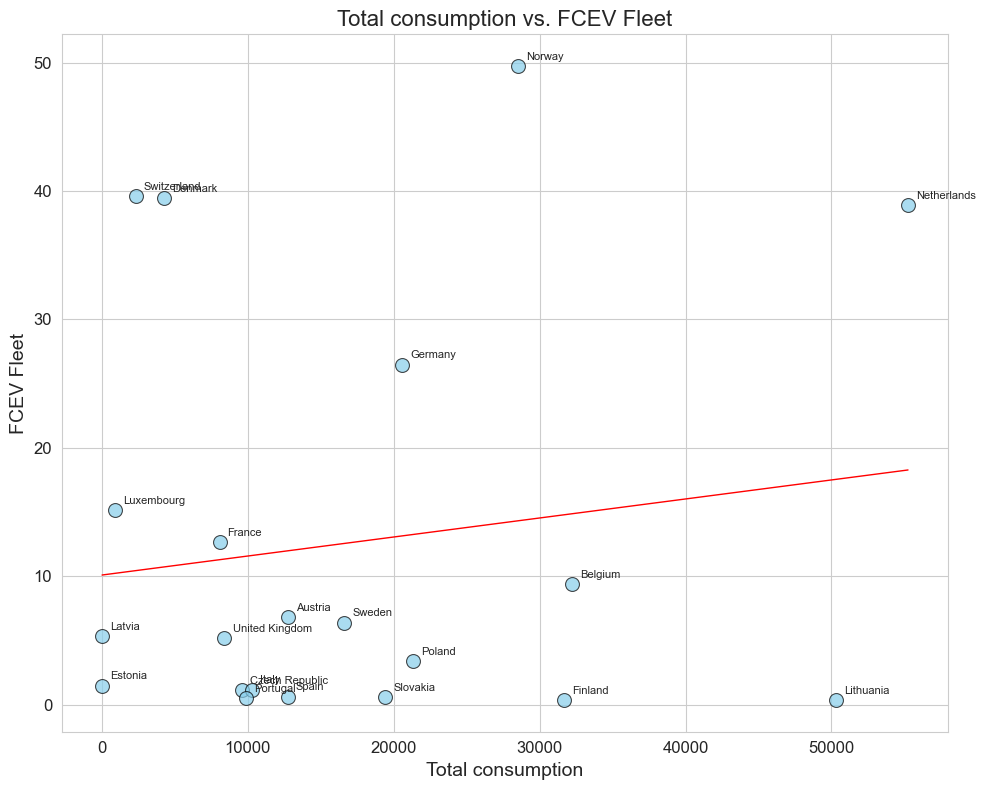

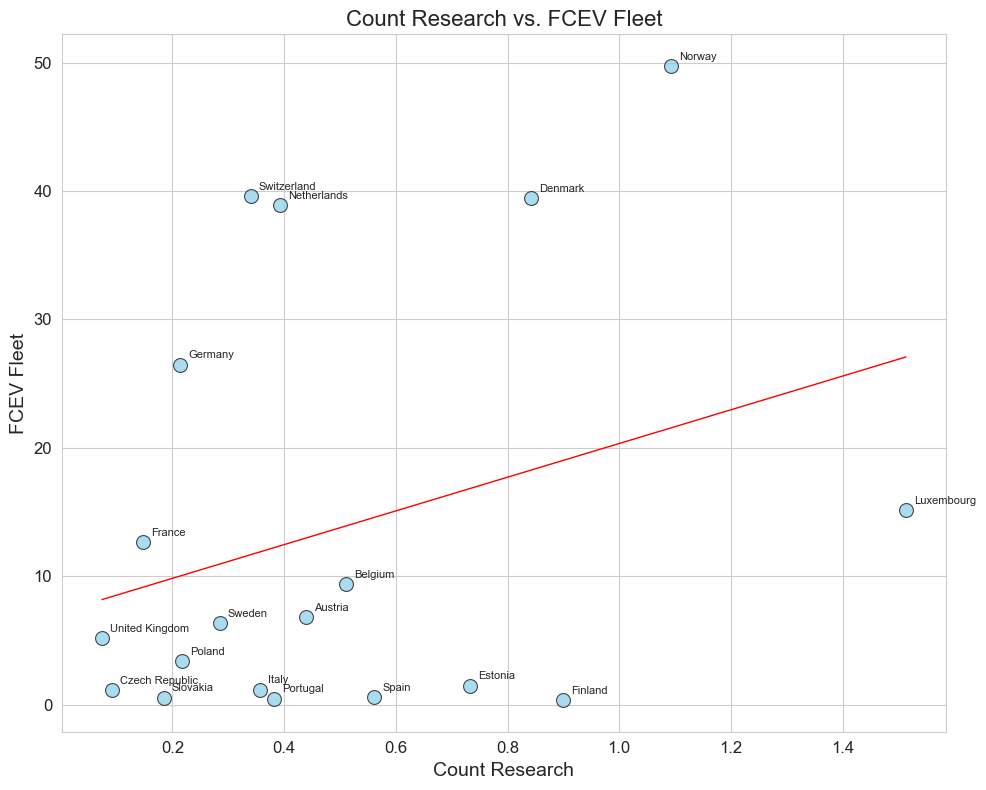

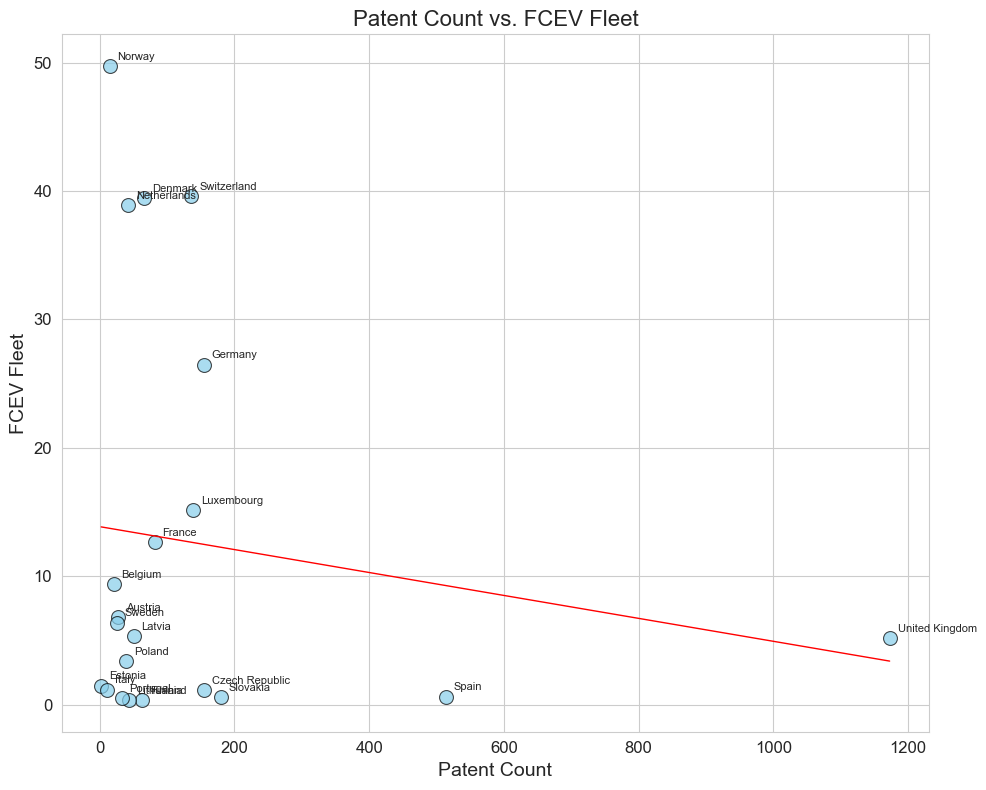

In [50]:
def create_correlation_plots(dataframe, var_pairs):
    for x_var, y_var in var_pairs:
        # Filter out rows with zero values in either x_var or y_var
        filtered_df = dataframe[(dataframe[x_var] != 0.0) & (dataframe[y_var] != 0.0)]

        plt.figure(figsize=(10, 8))
        sns.set_style("whitegrid")  # Set the style
        sns.scatterplot(x=x_var, y=y_var, data=filtered_df, s=100, alpha=0.7, color='skyblue', edgecolor='black')  # Adjust marker size and color
        sns.regplot(x=x_var, y=y_var, data=filtered_df, scatter=False, color='red', ci=None, line_kws={"linewidth": 1})  # Adjust regression line

        # Calculate offset based on data range of filtered data
        x_range = filtered_df[x_var].max() - filtered_df[x_var].min()
        y_range = filtered_df[y_var].max() - filtered_df[y_var].min()
        x_offset = x_range * 0.01
        y_offset = y_range * 0.01

        for i in range(len(filtered_df)):
            plt.text(filtered_df[x_var].iloc[i] + x_offset, filtered_df[y_var].iloc[i] + y_offset, filtered_df['Country'].iloc[i], fontsize=8)  # Adjust label font size

        plt.title(f'{x_var} vs. {y_var}', fontsize=16)  # Adjust title font size
        plt.xlabel(x_var, fontsize=14)  # Adjust x-axis label font size
        plt.ylabel(y_var, fontsize=14)  # Adjust y-axis label font size
        plt.xticks(fontsize=12)  # Adjust tick label font size
        plt.yticks(fontsize=12)  # Adjust tick label font size
        plt.tight_layout()  # Adjust layout
        plt.show()

all_variable_pairs = [
    ('Number of Companies', 'Count Research'),
    ('Number of Companies', 'Patent Count'),
    ('Output T/year', 'Value (€/kg)'),
    ('Number Stations', 'Value (€/kg)'),
    ('Count Research', 'Output T/year'),
    ('Patent Count', 'Output T/year'),
    ('FCEV Fleet', 'Output T/year'),
    ('Number of Companies', 'Total consumption'),
    ('Number of Companies', 'Number Stations'),
    ('Value (€/kg)', 'Output T/year'),
    ('Value (€/kg)', 'Number of Companies'),
    ('Value (€/kg)', 'Number Stations'),
    ('Output T/year', 'Total consumption'),
    ('Count Research', 'Patent Count'),
    ('Number Stations', 'FCEV Fleet'),
    ('Value (€/kg)', 'FCEV Fleet'),
    ('Output T/year', 'Number Stations'),
    ('Total consumption', 'Value (€/kg)'),
    ('Total consumption', 'FCEV Fleet'),
    ('Count Research', 'FCEV Fleet'),
    ('Patent Count', 'FCEV Fleet')
]


# Create correlation plots
create_correlation_plots(per_million_df, all_variable_pairs)


In [84]:
# Step 3: Value Chain Analysis
value_chain_steps = {
    'Production': ['Output T/year'],
    'Costs': ['Value (€/kg)'],
    'Demand': ['Total consumption'],
    'Research': ['Count Research'],
    'Innovation': ['Patent Count'],
    'Infrastructure': ['Number Stations'],
    'Usage': ['FCEV Fleet'],
    'Companies': ['Number of Companies']
}

relative_distribution = {}

for step, columns in value_chain_steps.items():
    relative_distribution[step] = merged_df[columns].sum(axis=1) / merged_df[columns].sum(axis=1).sum()
    print(f'{step}: {relative_distribution[step]}')


Production: 0     0.014029
1     0.049962
2     0.014722
3     0.007571
4     0.000000
5     0.012619
6     0.003032
7     0.000002
8     0.021436
9     0.067164
10    0.211825
11    0.039675
12    0.022841
13    0.000955
14    0.073857
15    0.000000
16    0.017457
17    0.000000
18    0.000000
19    0.118485
20    0.019149
21    0.095328
22    0.012913
23    0.016321
24    0.012829
25    0.000224
26    0.074654
27    0.021306
28    0.002497
29    0.000000
30    0.069146
dtype: float64
Costs: 0     0.039697
1     0.035798
2     0.029087
3     0.037621
4     0.028889
5     0.035666
6     0.038346
7     0.036218
8     0.035345
9     0.035170
10    0.040306
11    0.034032
12    0.042278
13    0.034438
14    0.045705
15    0.035760
16    0.038995
17    0.038344
18    0.017488
19    0.036226
20    0.020008
21    0.034553
22    0.031887
23    0.043952
24    0.040675
25    0.036467
26    0.032327
27    0.037427
28    0.000000
29    0.000000
30    0.007293
dtype: float64
Demand: 0     0.01417

In [85]:
relative_distribution = pd.DataFrame(relative_distribution)
relative_distribution.index = merged_df['Country']
relative_distribution

relative_distribution.sum(axis=0)

Production        1.0
Costs             1.0
Demand            1.0
Research          1.0
Innovation        1.0
Infrastructure    1.0
Usage             1.0
Companies         1.0
dtype: float64

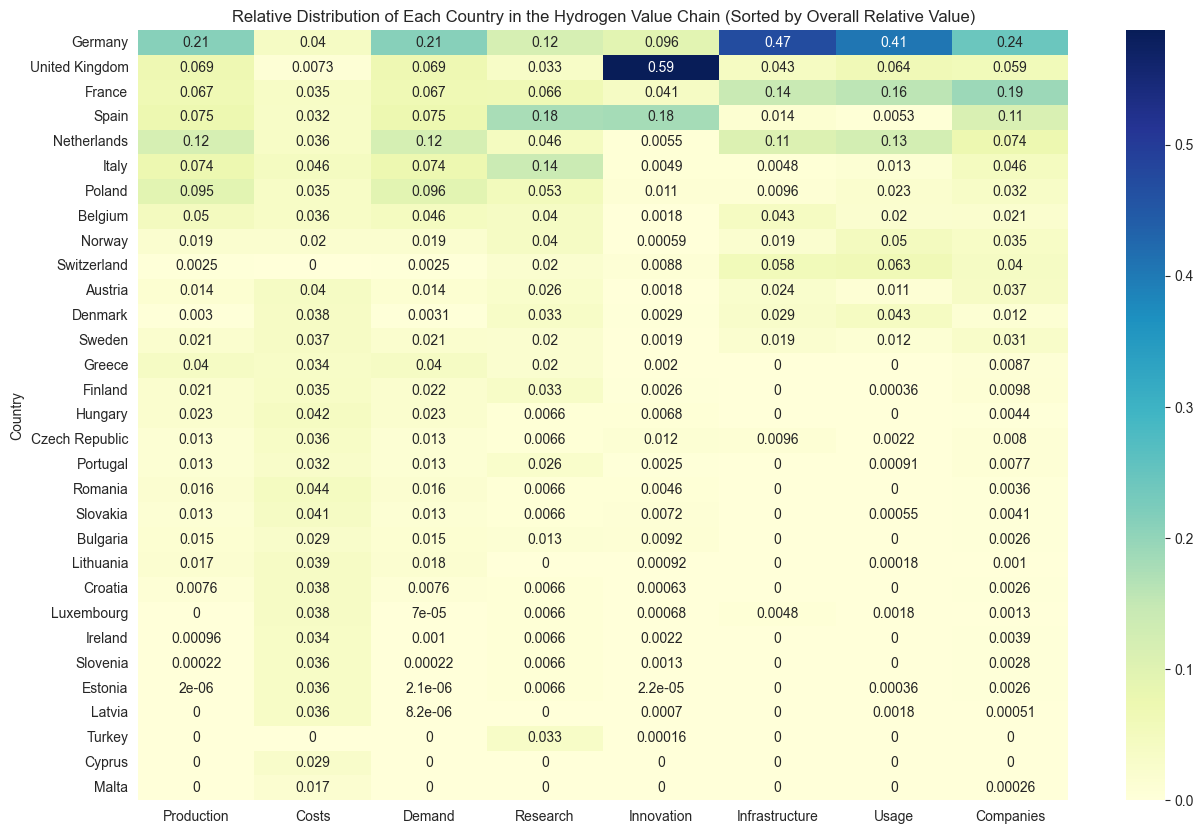

In [88]:
# Calculate the sum of each row
relative_distribution['row_sum'] = relative_distribution.sum(axis=1)

# Sort the DataFrame based on the row sum in descending order
relative_distribution_sorted = relative_distribution.sort_values(by='row_sum', ascending=False).drop(columns='row_sum')

# Plotting heatmap with sorted rows and rotated y-axis tick labels
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(relative_distribution_sorted, cmap='YlGnBu', annot=True, ax=ax)
ax.set_title('Relative Distribution of Each Country in the Hydrogen Value Chain (Sorted by Overall Relative Value)')
plt.yticks(rotation=0)  # Rotate y-axis tick labels to be horizontal
plt.show()

In [90]:
#give plot as png  
fig.savefig('relative_distribution.png')

In [89]:
relative_distribution_sorted

,Production,Costs,Demand,Research,Innovation,Infrastructure,Usage,Companies
Country,,,,,,,,
Germany,0.211825,0.040306,0.212045,0.119205,0.096249,0.471154,0.405779,0.243646
United Kingdom,0.069146,0.007293,0.069475,0.033113,0.587266,0.043269,0.063783,0.058793
France,0.067164,0.035170,0.067126,0.066225,0.041009,0.144231,0.156824,0.192555
Spain,0.074654,0.032327,0.074706,0.178808,0.182635,0.014423,0.005270,0.113222
Netherlands,0.118485,0.036226,0.120155,0.046358,0.005486,0.105769,0.125931,0.074198
Italy,0.073857,0.045705,0.074207,0.139073,0.004916,0.004808,0.012539,0.045956
Poland,0.095328,0.034553,0.095731,0.052980,0.010631,0.009615,0.022715,0.032349
Belgium,0.049962,0.035798,0.046175,0.039735,0.001789,0.043269,0.019989,0.021309
Norway,0.019149,0.020008,0.019135,0.039735,0.000591,0.019231,0.049609,0.034660
